In [8]:
addpath(genpath('matlab'))

# Load the data
Load one of the following datasets or own data.

### Iris

In [2]:
x = readtable('Data/bezdekIris.data.txt');
data = x{:,1:4};
c_g = ones(150,1);c_g(51:100) = 2;c_g(101:150) = 3;
n_g = 3;

### Glass

In [ ]:
x = readtable('Data/glass.data.txt');
data = x{:,2:10};
c_g = x{:,11};
c_g(c_g==7) = 4;
data = zscore(data);
n_g = 6;

### Wine

In [ ]:
x = readtable('Data/wine.data.txt');
data = x{:,2:14};
c_g = x{:,1};
data = zscore(data);
n_g = 3;

### WDBC

In [ ]:
x = readtable('Data/wdbc.data.txt');
data = x{:,3:32};
[~,~,c_g] = unique(x{:,2});
data = zscore(data);
n_g = 2;

### Control chart

In [ ]:
x = readtable('Data/synthetic_control.data.txt');
data = x{:,:};
c_g = repmat(1:6,100,1); c_g = c_g(:);
% data = zscore(data);
n_g = 6;

### Parkinsons

In [ ]:
x = readtable('Data/parkinsons.data.txt');
data = x{:,[2:17,19:24]};
c_g = x{:,18} + 1;
data = zscore(data);
n_g = 2;

### Vertebral

In [ ]:
x = readtable('Data/column_3C.dat');
data = x{:,1:6};
[~,~,c_g] = unique(x{:,7});
% data = zscore(data);
n_g = 3;

### Breast tissue

In [ ]:
x = readtable('Data/breast-tissue.txt');
data = x{:,3:11};
[~,~,c_g] = unique(x{:,2});
data = zscore(data);
n_g = 6;

### Seeds

In [ ]:
x = readtable('Data/seeds_dataset.txt');
data = x{:,1:7};
c_g = x{:,8};
data = zscore(data);
n_g = 3;

### Segmentation

In [ ]:
x = readtable('Data/segmentation.data.txt');
x1 = readtable('Data/segmentation.test.txt');
x = [x;x1];
data = x{:,2:end};
[~,~,c_g] = unique(x{:,1});
data = zscore(data);
n_g = 7;

### Yeast

In [ ]:
x = readtable('Data/yeast.data.txt','Delimiter',' ','MultipleDelimsAsOne',1);
data = x{:,2:9};
[~,~,c_g] = unique(x{:,10});
data = zscore(data);
n_g = 10;

### Generated data

In [ ]:
%% Synthetic data
x = load('Data/synthetic.mat');
data = x.x;
n_g = 9;

# Use Markov Stability to choose the number of clusters
The graph and parameter can be changed. The `Time` can be adjusted according to the graph.

In [ ]:
% Construct the graph
D = squareform(pdist(data));
k = 7; 
G = constructNetworkStructure(data', D,'cknn',k); %use cknn graph with k=7
A = double(G);
Time = 10.^[0:0.1:2]; % Markov time.

Postprocessing...
Post-processing Markov time: 1.000000	(1 of 21)
Post-processing Markov time: 1.258925	(2 of 21)
Post-processing Markov time: 1.584893	(3 of 21)
Post-processing Markov time: 1.995262	(4 of 21)
Post-processing Markov time: 2.511886	(5 of 21)
Post-processing Markov time: 3.162278	(6 of 21)
Post-processing Markov time: 3.981072	(7 of 21)
Post-processing Markov time: 5.011872	(8 of 21)
Post-processing Markov time: 6.309573	(9 of 21)
Post-processing Markov time: 7.943282	(10 of 21)
Post-processing Markov time: 10.000000	(11 of 21)
Post-processing Markov time: 12.589254	(12 of 21)
Post-processing Markov time: 15.848932	(13 of 21)
Post-processing Markov time: 19.952623	(14 of 21)
Post-processing Markov time: 25.118864	(15 of 21)
Post-processing Markov time: 31.622777	(16 of 21)
Post-processing Markov time: 39.810717	(17 of 21)
Post-processing Markov time: 50.118723	(18 of 21)
Post-processing Markov time: 63.095734	(19 of 21)
Post-processing Markov time: 79.432823	(20 of 21)
P

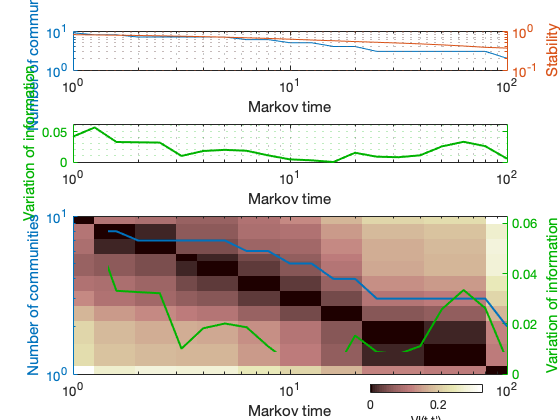

In [13]:
%[Stb, N, VI, C] = stability(A,Time,'full','plot','p'); %run in parrallel
[Stb, N, VI, C] = stability(A,Time,'full','plot');

Choose a scale from the plot, and set the index to be i.

In [15]:
i = 16;
C_out = C(:,i);
disp('The nmi is: '),disp(nmi(C_out,c_g))
disp('The ARI is: '),disp(adjrand(C_out,c_g))
disp('The Purity is: '),disp(purity(C_out,c_g))

The nmi is: 
    0.7980

The ARI is: 
    0.7455

The Purity is: 
    0.9000



# Visualise the partitions with MDS

In [9]:
%% Synthetic data
x = load('Data/synthetic.mat');
data = x.x;
n_g = 9;

% Construct the graph
D = squareform(pdist(data));
k = 10;
G = constructNetworkStructure(data', D,'cknn',k); %use cknn graph with k=7
A = double(G);
Time = 10.^[0:0.1:3]; % Markov time.

Postprocessing...
Post-processing Markov time: 1.000000	(1 of 31)
Post-processing Markov time: 1.258925	(2 of 31)
Post-processing Markov time: 1.584893	(3 of 31)
Post-processing Markov time: 1.995262	(4 of 31)
Post-processing Markov time: 2.511886	(5 of 31)
Post-processing Markov time: 3.162278	(6 of 31)
Post-processing Markov time: 3.981072	(7 of 31)
Post-processing Markov time: 5.011872	(8 of 31)
Post-processing Markov time: 6.309573	(9 of 31)
Post-processing Markov time: 7.943282	(10 of 31)
Post-processing Markov time: 10.000000	(11 of 31)
Post-processing Markov time: 12.589254	(12 of 31)
Post-processing Markov time: 15.848932	(13 of 31)
Post-processing Markov time: 19.952623	(14 of 31)
Post-processing Markov time: 25.118864	(15 of 31)
Post-processing Markov time: 31.622777	(16 of 31)
Post-processing Markov time: 39.810717	(17 of 31)
Post-processing Markov time: 50.118723	(18 of 31)
Post-processing Markov time: 63.095734	(19 of 31)
Post-processing Markov time: 79.432823	(20 of 31)
P

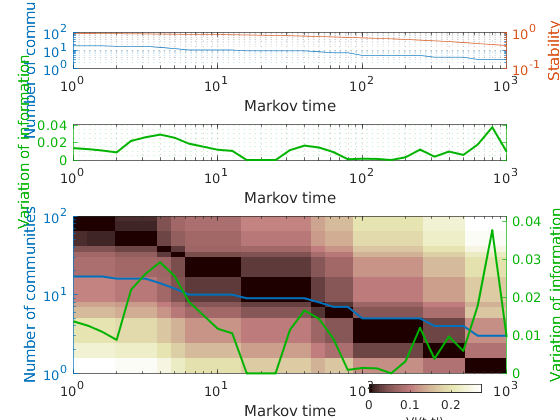

In [10]:
% run MS
n_L = 100; % the number of Louvain runs per Markov time
[Stb, N, VI, C,c_all] = stability_v1(A,Time,'full','plot','L',n_L,'M',n_L);

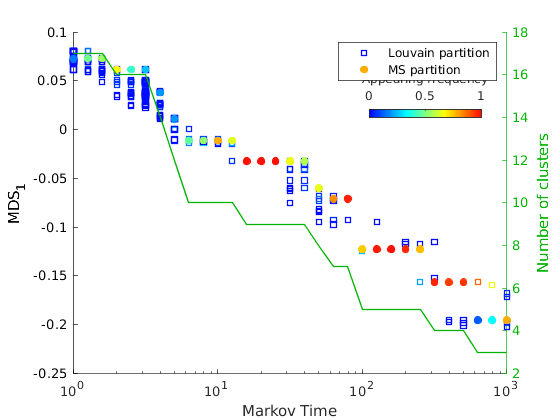

In [11]:
stability_mdsplot(c_all,C,N,Time,n_L)

# Use the number of clusters in ground truth

In [ ]:
k = 7;
D = squareform(pdist(data));
G = constructNetworkStructure(data', D,'cknn',k);
A = double(G);
Time = 10.^[0:0.1:2];
[Stb, N, VI, C] = stability(A,Time,'full');

In [16]:
is = find(N==n_g); % find the partition with n_g clusters
if ~isempty(is)
    disp('Found partitions with N_ground_truth groups')
    C_tmp = C(:,is);
    nmi_tmp = is;
    ari_tmp = is;
    for i = 1:length(is)
        nmi_tmp(i) = nmi(C_tmp(:,i),c_g);
        ari_tmp(i) = adjrand(C_tmp(:,i),c_g);
    end
end

Found partitions with N_ground_truth groups


In [17]:
C_out = C(:,is(1));
disp('The nmi is: '),disp(nmi(C_out,c_g))
disp('The ARI is: '),disp(adjrand(C_out,c_g))
disp('The Purity is: '),disp(purity(C_out,c_g))

The nmi is: 
    0.7980

The ARI is: 
    0.7455

The Purity is: 
    0.9000

